In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose



In [18]:
# Load the dataset
data = pd.read_csv('silver.csv')



In [19]:
# Convert 'Date' to datetime and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)



In [20]:
# Drop rows with missing values in 'USD'
data.dropna(subset=['USD'], inplace=True)



In [21]:
# ---------- USD Analysis ----------
# Regular differencing
data['usd_diff'] = data['USD'].diff()



In [22]:
# Seasonal decomposition of original USD
result_usd = seasonal_decompose(data['USD'], model='additive', period=12)
data['usd_sea_diff'] = result_usd.resid



In [23]:
# Log transformation
data['usd_log'] = np.log(data['USD'])



In [24]:
# Log transformation + regular differencing
data['usd_log_diff'] = data['usd_log'].diff().dropna()



In [25]:
# Seasonal decomposition after log differencing
if len(data['usd_log_diff'].dropna()) >= 12:  # Check if enough data exists for decomposition
    result_usd_log = seasonal_decompose(data['usd_log_diff'].dropna(), model='additive', period=12)
    data['usd_log_seasonal_diff'] = result_usd_log.resid
else:
    data['usd_log_seasonal_diff'] = np.nan
    print("Not enough data for seasonal decomposition after log differencing for USD.")



In [26]:
# Plotting results
plt.figure(figsize=(16, 12))



<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

Text(0.5, 1.0, 'Original USD Data')

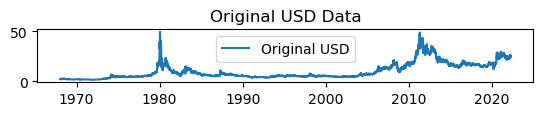

In [27]:
plt.subplot(6, 1, 1)
plt.plot(data['USD'], label='Original USD')
plt.legend(loc='best')
plt.title('Original USD Data')



Text(0.5, 1.0, 'USD Regular Differencing')

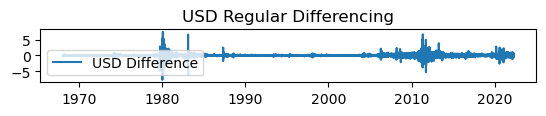

In [28]:
plt.subplot(6, 1, 2)
plt.plot(data['usd_diff'], label='USD Difference')
plt.legend(loc='best')
plt.title('USD Regular Differencing')



Text(0.5, 1.0, 'USD Seasonal Adjustment')

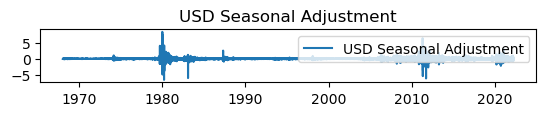

In [29]:
plt.subplot(6, 1, 3)
plt.plot(data['usd_sea_diff'], label='USD Seasonal Adjustment')
plt.legend(loc='best')
plt.title('USD Seasonal Adjustment')



Text(0.5, 1.0, 'Log Transformation of USD')

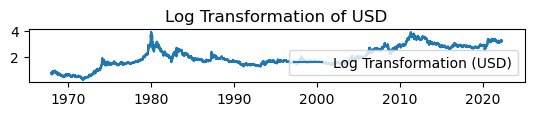

In [30]:
plt.subplot(6, 1, 4)
plt.plot(data['usd_log'], label='Log Transformation (USD)')
plt.legend(loc='best')
plt.title('Log Transformation of USD')

Text(0.5, 1.0, 'Log Transformation and Differencing (USD)')

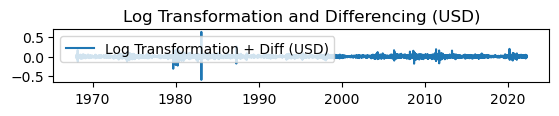

In [31]:
plt.subplot(6, 1, 5)
plt.plot(data['usd_log_diff'], label='Log Transformation + Diff (USD)')
plt.legend(loc='best')
plt.title('Log Transformation and Differencing (USD)')

Text(0.5, 1.0, 'Log, Differencing, and Seasonal Adjustment (USD)')

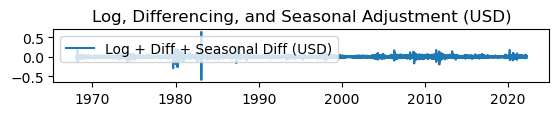

In [32]:
plt.subplot(6, 1, 6)
plt.plot(data['usd_log_seasonal_diff'], label='Log + Diff + Seasonal Diff (USD)')
plt.legend(loc='best')
plt.title('Log, Differencing, and Seasonal Adjustment (USD)')